In [1]:
import pandas as pd

dist_df = pd.read_csv('distritos.csv', sep=';')
dist_df = dist_df[dist_df['cod_municipio'] == 36].copy()

In [2]:
zona_dist_dict = {}
for i, row in dist_df[['zona', 'cod_distrito']].iterrows():
    zona_dist_dict[row['zona']] = row['cod_distrito']

In [3]:
df = pd.read_feather("../../data/processed/clusterized_df.feather")

In [12]:
import networkx as nx

G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

In [13]:
from collections import defaultdict

def make_dist_dic():
    dist_dic = defaultdict(int)

    for n, v in G.nodes(data=True):
        home = zona_dist_dict[int(v['home'])]
        dist_dic[home] += 1
    
    return dist_dic

homes = make_dist_dic()

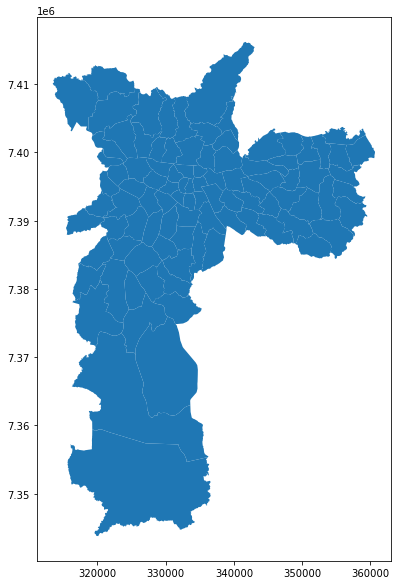

In [23]:
import geopandas as gpd

gdf = gpd.read_file('DEINFO_DISTRITO.shp')
gdf.plot(legend=True, figsize=(10, 10));


In [32]:
dist_df

,zona,nome,cod_municipio,municipio,cod_distrito,distrito,popu
0,1,Sé,36,São Paulo,80,Sé,3262
1,2,Parque Dom Pedro,36,São Paulo,80,Sé,5695
2,3,Praça João Mendes,36,São Paulo,80,Sé,17130
3,4,Ladeira da Memória,36,São Paulo,67,República,24089
4,5,República,36,São Paulo,67,República,14956
...,...,...,...,...,...,...,...
337,338,Jaguaré,36,São Paulo,40,Jaguaré,31544
338,339,Cidade Universitária,36,São Paulo,12,Butantã,
339,340,Butantã,36,São Paulo,12,Butantã,7738
340,341,Jardim Caxingui,36,São Paulo,12,Butantã,10541


In [51]:
import matplotlib.pyplot as plt

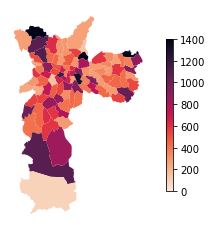

In [71]:
gdf.COD_DIST = gdf.COD_DIST.astype(int)
gdf['pop'] = gdf['COD_DIST'].apply(lambda x: homes[x])
import seaborn as sns
cmap = sns.cm.rocket_r

fig, ax = plt.subplots()

gdf.plot(ax=ax, column='pop', cmap=cmap, vmin=0, vmax = 1400, legend=True, legend_kwds={'shrink': 0.7})

fig.patch.set_visible(False)
ax.axis('off')

plt.savefig('Mapa_Residentes.pdf', bbox_inches = 'tight', pad_inches = .1)

array(['47', '46', '5', '40', '93', '41', '42', '44', '45', '96', '48',
       '49', '50', '92', '43', '55', '94', '01', '2', '3', '4', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '33', '34', '35', '36', '37', '38', '39', '51', '52',
       '32', '53', '54', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '67', '68', '70', '71', '95', '72', '73', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '69', '66'], dtype=object)